In [65]:


!pip install lightgbm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.figure_factory as ff



import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


SalePrice - the property's sale price in dollars.
This is the target variable that you're trying to predict.

Areas
1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

GrLivArea: Above grade (ground) living area square feet
TotalBsmtSF: Total square feet of basement area
MasVnrArea: Masonry veneer area in square feet
GarageArea: Size of garage in square feet

LowQualFinSF: Low quality finished square feet (all floors)
BsmtFinSF1: Type 1 finished square feet
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area

WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet

Class, Condition, Quality
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
MSSubClass: The building class
MSZoning: The general zoning classification
Neighborhood: Physical locations within Ames city limits
BldgType: Type of dwelling
HouseStyle: Style of dwelling
Foundation: Type of foundation
Functional: Home functionality rating

RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type

KitchenQual: Kitchen quality
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
FireplaceQu: Fireplace quality
PoolQC: Pool quality
Fence: Fence quality

Utilities: Type of utilities available
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system

Rooms, numbers
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Fireplaces: Number of fireplaces

Lot, Street, Alley
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
LotConfig: Lot configuration
LandSlope: Slope of property
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
PavedDrive: Paved driveway

BASEMENT

BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms

Garage
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageQual: Garage quality
GarageCond: Garage condition

Years
YearBuilt: Original construction date
YearRemodAdd: Remodel date
MoSold: Month Sold
YrSold: Year Sold

MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature

SaleType: Type of sale
SaleCondition: Condition of sale


In [66]:

train= pd.read_csv("C:/Users/Admin/Desktop/sarod/regression/housing price/train.csv")
test=pd.read_csv("C:/Users/Admin/Desktop/sarod/regression/housing price/test.csv")
print("train dataset shape:",train.shape)
print("test dataset shape:",test.shape)

train dataset shape: (1460, 81)
test dataset shape: (1459, 80)


In [67]:
from IPython.display import display
pd.set_option('display.max_columns', None)


In [68]:
train.head(20)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7          Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8          Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9          Lvl    AllPub    Corner       Gtl      BrkSide     Artery   
10         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
11         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
12         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
13         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
14         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
15         Lvl    AllPub    Corner       Gtl      BrkSide       Norm   
16         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
17         Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
18         Lvl    AllPub    Inside       Gtl      SawyerW       RRAe   
19         Lvl    AllPub    Inside       Gtl        NAmes       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0        Norm     1Fam     2Story            7            5       2003   
1        Norm     1Fam     1Story            6            8       1976   
2        Norm     1Fam     2Story            7            5       2001   
3        Norm     1Fam     2Story            7            5       1915   
4        Norm     1Fam     2Story            8            5       2000   
5        Norm     1Fam     1.5Fin            5            5       1993   
6        Norm     1Fam     1Story            8            5       2004   
7        Norm     1Fam     2Story            7            6       1973   
8        Norm     1Fam     1.5Fin            7            5       1931   
9      Artery   2fmCon     1.5Unf            5            6       1939   
10       Norm     1Fam     1Story            5            5       1965   
11       Norm     1Fam     

In [69]:
#Describe numerical features
train.describe().transpose()

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [70]:
#describe categorical features
train.describe(include = ['O']).transpose()

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [72]:
#number of unique values for each columns in train df
for i in train:
               print(f'unique [{i}] count:', train[i].nunique())

unique [Id] count: 1460
unique [MSSubClass] count: 15
unique [MSZoning] count: 5
unique [LotFrontage] count: 110
unique [LotArea] count: 1073
unique [Street] count: 2
unique [Alley] count: 2
unique [LotShape] count: 4
unique [LandContour] count: 4
unique [Utilities] count: 2
unique [LotConfig] count: 5
unique [LandSlope] count: 3
unique [Neighborhood] count: 25
unique [Condition1] count: 9
unique [Condition2] count: 8
unique [BldgType] count: 5
unique [HouseStyle] count: 8
unique [OverallQual] count: 10
unique [OverallCond] count: 9
unique [YearBuilt] count: 112
unique [YearRemodAdd] count: 61
unique [RoofStyle] count: 6
unique [RoofMatl] count: 8
unique [Exterior1st] count: 15
unique [Exterior2nd] count: 16
unique [MasVnrType] count: 4
unique [MasVnrArea] count: 327
unique [ExterQual] count: 4
unique [ExterCond] count: 5
unique [Foundation] count: 6
unique [BsmtQual] count: 4
unique [BsmtCond] count: 4
unique [BsmtExposure] count: 4
unique [BsmtFinType1] count: 6
unique [BsmtFinSF1] c

In [73]:
print ("sales_price skewness:",train['SalePrice'].skew())
print("sales price kurtosis:",train['SalePrice'].kurt())
train['SalePriceLog']=np.log1p(train['SalePrice'])
print("sales_price_log skewness:",train['SalePriceLog'].skew())
print("sales_price log kurtosis:",train["SalePriceLog"].kurt())
a=train.SalePrice.skew()

sales_price skewness: 1.8828757597682129
sales price kurtosis: 6.536281860064529
sales_price_log skewness: 0.12134661989685333
sales_price log kurtosis: 0.809519155707878


In [74]:


fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles=["SalePrice", "SalePriceLog"])


trace_1 = go.Histogram(x=train["SalePrice"], name="SalePrice")
trace_2 = go.Histogram(x=train["SalePriceLog"], name="SalePriceLog")

fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)

iplot(fig)


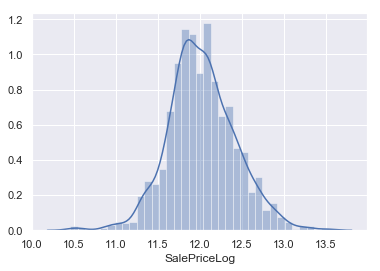

In [75]:
sns.distplot(train['SalePriceLog'])

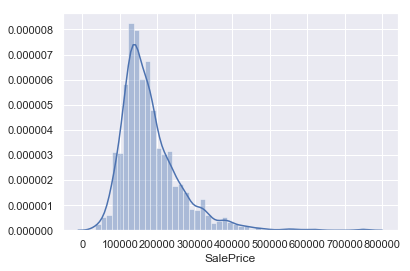

In [76]:
x=sns.distplot(train['SalePrice'])










# Handling missing values

In [77]:
missing_data_total=train.isnull().sum().sort_values(ascending= False)
missing_data_ratio= (train.isnull().sum()/train.isnull().count().sort_values(ascending=False))
missing_data= pd.concat([missing_data_total,missing_data_ratio],axis=1, keys=['total','ratio'])
missing_data['Type']=train[missing_data.index].dtypes
missing_data= missing_data[(missing_data['total']>0)]
missing_data

total     ratio     Type
Alley          1369  0.937671   object
BsmtCond         37  0.025342   object
BsmtExposure     38  0.026027   object
BsmtFinType1     37  0.025342   object
BsmtFinType2     38  0.026027   object
BsmtQual         37  0.025342   object
Electrical        1  0.000685   object
Fence          1179  0.807534   object
FireplaceQu     690  0.472603   object
GarageCond       81  0.055479   object
GarageFinish     81  0.055479   object
GarageQual       81  0.055479   object
GarageType       81  0.055479   object
GarageYrBlt      81  0.055479  float64
LotFrontage     259  0.177397  float64
MasVnrArea        8  0.005479  float64
MasVnrType        8  0.005479   object
MiscFeature    1406  0.963014   object
PoolQC         1453  0.995205   object

In [78]:
#filling missing features of categorical values(train_set)
train.Alley.fillna('NA',inplace=True)
train.BsmtCond.fillna('NA',inplace=True)
train.BsmtExposure.fillna('NA',inplace=True)
train.BsmtFinType1.fillna('NA',inplace=True)
train.BsmtFinType2.fillna('NA',inplace=True)
train.BsmtQual.fillna('NA',inplace=True)
train.Electrical.fillna(train.Electrical.mode()[0],inplace=True)
train.Fence.fillna('NA',inplace=True)
train.FireplaceQu.fillna('NA',inplace=True)
train.GarageCond.fillna('NA',inplace=True)
train.GarageQual.fillna('NA',inplace=True)
train.GarageType.fillna('NA',inplace=True)
train.MasVnrType.fillna('Nan',inplace=True)
train.GarageFinish.fillna('NA',inplace=True)
train.MiscFeature.fillna('NA',inplace=True)
train.PoolQC.fillna('NA',inplace=True)

#filling missing values of categorical Features

train.GarageYrBlt.fillna(0,inplace=True)
train.LotFrontage.fillna(0,inplace=True)
train.MasVnrArea.fillna(0,inplace=True)






In [79]:
missing_data_total=test.isnull().sum().sort_values(ascending= False)
missing_data_ratio= (test.isnull().sum()/test.isnull().count().sort_values(ascending=False))
missing_data= pd.concat([missing_data_total,missing_data_ratio],axis=1, keys=['total','ratio'])
missing_data['Type']=test[missing_data.index].dtypes
missing_data= missing_data[(missing_data['total']>0)]
missing_data

total     ratio     Type
Alley          1352  0.926662   object
BsmtCond         45  0.030843   object
BsmtExposure     44  0.030158   object
BsmtFinSF1        1  0.000685  float64
BsmtFinSF2        1  0.000685  float64
BsmtFinType1     42  0.028787   object
BsmtFinType2     42  0.028787   object
BsmtFullBath      2  0.001371  float64
BsmtHalfBath      2  0.001371  float64
BsmtQual         44  0.030158   object
BsmtUnfSF         1  0.000685  float64
Exterior1st       1  0.000685   object
Exterior2nd       1  0.000685   object
Fence          1169  0.801234   object
FireplaceQu     730  0.500343   object
Functional        2  0.001371   object
GarageArea        1  0.000685  float64
GarageCars        1  0.000685  float64
GarageCond       78  0.053461   object
GarageFinish     78  0.053461   object
GarageQual       78  0.053461   object
GarageType       76  0.052090   object
GarageYrBlt      78  0.053461  float64
KitchenQual       1  0.000685   object
LotFrontage     227  0.155586  float64
MSZoning          4  0.002742   object
MasVnrArea       15  0.010281  float64
MasVnrType       16  0.010966   object
MiscFeature    1408  0.965045   object
PoolQC         1456  0.997944   object
SaleType          1  0.000685   object
TotalBsmtSF       1  0.000685  float64
Utilities         2  0.001371   object

In [80]:
#filling missing features of categorical values(test_set)
test.Alley.fillna('NA',inplace=True)
test.BsmtCond.fillna('NA',inplace=True)
test.BsmtExposure.fillna('NA',inplace=True)
test.BsmtFinType1.fillna('NA',inplace=True)
test.BsmtFinType2.fillna('NA',inplace=True)
test.BsmtQual.fillna('NA',inplace=True)
test.Electrical.fillna(test.Electrical.mode()[0],inplace=True)
test.Fence.fillna('NA',inplace=True)
test.FireplaceQu.fillna('NA',inplace=True)
test.GarageCond.fillna('NA',inplace=True)
test.GarageQual.fillna('NA',inplace=True)
test.GarageType.fillna('NA',inplace=True)
test.MasVnrType.fillna('Nan',inplace=True)
test.GarageFinish.fillna('NA',inplace=True)
test.MiscFeature.fillna('NA',inplace=True)
test.PoolQC.fillna('NA',inplace=True)
test.Exterior1st.fillna(test.Exterior1st.mode()[0],inplace=True)
test.Exterior2nd.fillna(test.Exterior2nd.mode()[0],inplace=True)
test.Functional.fillna(test.Functional.mode()[0],inplace=True)
test.KitchenQual.fillna(test.KitchenQual.mode()[0],inplace=True)
test.MSZoning.fillna(test.MSZoning.mode()[0],inplace=True)
test.SaleType.fillna(test.SaleType.mode()[0],inplace=True)
test.Utilities.fillna(test.Utilities.mode()[0],inplace=True)





#filling missing values of numerical Features(test_set)

test.GarageYrBlt.fillna(0,inplace=True)
test.LotFrontage.fillna(0,inplace=True)
test.MasVnrArea.fillna(0,inplace=True)
test.BsmtFinSF1.fillna(0,inplace=True)
test.BsmtFinSF2.fillna(0,inplace=True)
test.BsmtFullBath.fillna(0,inplace=True)
test.BsmtHalfBath.fillna(0,inplace=True)
test.BsmtUnfSF.fillna(0,inplace=True)
test.GarageArea.fillna(0,inplace=True)
test.GarageCars.fillna(test.GarageCars.mode()[0],inplace=True)
test.TotalBsmtSF.fillna(0,inplace=True)





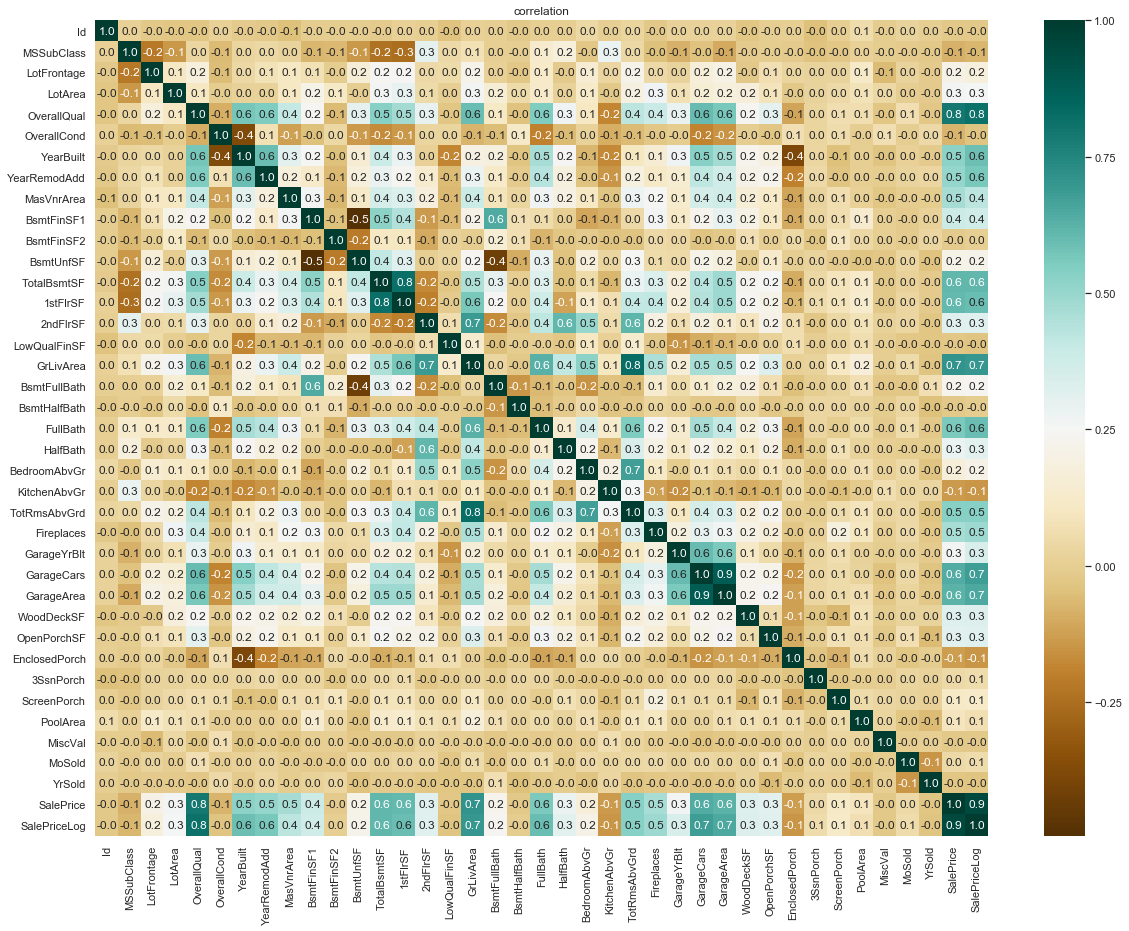

In [81]:
corr=train.corr()

fig,ax=plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True,fmt='.1f',ax=ax,cmap="BrBG")
sns.set(font_scale=1)
plt.title("correlation")
plt.show()


In [82]:
corr_price =train[train.columns[1:]].corr()['SalePrice'].abs().sort_values(ascending=False)[2:]
filt_price_corr=corr_price[((corr_price >= .3) | (corr_price <= -.3)) & (corr_price !=1.000)]
corr_price_df=pd.DataFrame(corr_price)
corr_price_df


SalePrice
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
GarageYrBlt     0.261366
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
LotFrontage     0.209624
BedroomAbvGr    0.168213
KitchenAbvGr    0.135907
EnclosedPorch   0.128578
ScreenPorch     0.111447
PoolArea        0.092404
MSSubClass      0.084284
OverallCond     0.077856
MoSold          0.046432
3SsnPorch       0.044584
YrSold          0.028923
LowQualFinSF    0.025606
MiscVal         0.021190
BsmtHalfBath    0.016844
BsmtFinSF2      0.011378

In [83]:
data = go.Bar(x=corr_price.index,
              y=corr_price.values)
layout= go.Layout(title="Correlation to sales price",
                 xaxis= dict(title=''),
                  yaxis= dict(title='correlation'), 
                  autosize=False, width=750, height=500,)
fig = dict(data=[data],layout=layout)
iplot(fig)

# Area  Features
 
 it can be seen that the area features is highly correlated to sales price.From this we can expect the value of the house  to increase with area.


In [84]:
# scatter plot to compare sales price vs general livng area as they are highly correalated
data=go.Scatter(x=train.GrLivArea,
                y=train.SalePrice,mode='markers',opacity=0.8)

layout= go.Layout(title=" Sales_price vs GrLivArea",
                 xaxis= dict(title='GrLivArea',ticklen=5, zeroline=False),
                 yaxis=dict(title='SalePrice',zeroline=True),
                autosize=False,width=750,height=500,)
fig=dict(data=[data],layout=layout)
iplot(fig)


there appears to be two outliers in the scatter plot

In [85]:
#anaysing potential outliers and storing  them
outliers_price =train.loc[(train['GrLivArea'] >4500) & (train['SalePrice']<200000)]
outliers_price

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave    NA      IR1   
1298  1299          60       RL        313.0    63887   Pave    NA      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
523        PosN     1Fam     2Story           10            5       2007   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
523           2008       Hip  CompShg     CemntBd     CmentBd      Stone   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
523        762.0        Ex        TA      PConc       Ex       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
523            Gd          GLQ        2260          Unf           0   
1298           Gd          GLQ        5644          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
523         878         3138    GasA        Ex          Y      SBrkr   
1298        466         6110    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
523       3138      1538             0       4676             1             0   
1298      4692       950             0       5642             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
523          3         1             3             1          Ex   
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
523             11        Typ           1          Gd    BuiltIn       2007.0   
1298            12        Typ           3          Gd     Attchd       2008.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
523           Fin           3         884         TA         TA          Y   
1298          Fin           2        1418         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
523          208          406              0          0            0   
1298         214          292              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
523          0     NA    NA          NA        0      10    2007      New   
1298       480     Gd    NA          NA        0       1    2008      New   

     SaleCondition  SalePrice  SalePriceLog  
523        Partial     184750     12.126764  
1298       Partial     160000     11.982935

both  the data points appers to be outliers  most columns which are higly correlated with price are not correlated doesnt match with price

note(feature Engineering)

GrliveArea = 1stFlr + 2ndFlrSF+(lowQualFinSF)

SaleType

In [86]:
#checking if GrlivArea=1stflr+2ndFlrSf+lowQulaFinSf
train['sum_1st_2nd_lowqSF']=train['1stFlrSF']+train['2ndFlrSF']+train['LowQualFinSF']
test['sum_1st_2nd_lowqSF']=test['1stFlrSF']+test['2ndFlrSF']+test['LowQualFinSF']
print(sum(train['sum_1st_2nd_lowqSF'] != train['GrLivArea']))
print(sum(test['sum_1st_2nd_lowqSF'] != test['GrLivArea']))

0
0


In [87]:
#droping sum_1st_2nd_lowSF as it already exits as GrLivArea
train.drop('sum_1st_2nd_lowqSF',axis=1,inplace= True)
test.drop('sum_1st_2nd_lowqSF',axis=1,inplace=True)

1stFlrSF' correlation to SalePrice = 0.605

2ndFlrSF' correlation to SalePrice =0.32

LowQualFinSF' correlation to SalePrice = 0.02

Grlivearea(1stflrsf+2ndflrsf+lowqualfinsf)  correlation to sales price=0.708

In the following we check if we can derive further useful features by adding or
subtracting some of the area features.

In [88]:
((train['GrLivArea'])-(train['LowQualFinSF'])).corr(train['SalePrice'])

0.7168830793692811

In [89]:
train.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave    NA      Reg   
1   2          20       RL         80.0     9600   Pave    NA      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn           2         548         TA   
1     Attchd       1976.0          RFn           2         460         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0     NA    NA          NA        0       2    2008   
1            0         0     NA    NA          NA        0       5    2007   

  SaleType SaleCondition  SalePrice  SalePriceLog  
0       WD        Normal     208500     12.247699  
1       WD        Normal     181500     12.109016

In [90]:
#checking if totalBsmtSf=BsmtFinSF1+BsmtFinSF2+BsmtUnfSF
train['sum_total_base']=train['BsmtFinSF1']+train['BsmtFinSF2']+train['BsmtUnfSF']
test['sum_total_base']=test['BsmtFinSF1']+test['BsmtFinSF2']+test['BsmtUnfSF']
print(sum(train['sum_total_base'] != train['TotalBsmtSF']))
print(sum(test['sum_total_base'] != test['TotalBsmtSF']))

0
0


In [91]:
y_col_vals = 'SalePrice'
area_features = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                 'MasVnrArea', 'GarageArea', 'LotArea',
                 'WoodDeckSF', 'OpenPorchSF', 'BsmtFinSF1','BsmtUnfSF',
                'LowQualFinSF','GrLivArea']
                # 'ScreenPorch'
x_col_vals = area_features

In [92]:
nr_rows=3
nr_cols=4

fig = tools.make_subplots(rows=nr_rows, cols=nr_cols, print_grid=False,
                          subplot_titles=area_features )
                                                                
for row in range(1,nr_rows+1):
    for col in range(1,nr_cols+1): 
        
        i = (row-1) * nr_cols + col-1
                   
        trace = go.Scatter(x = train[x_col_vals[i]], 
                           y = train[y_col_vals], 
                           name=x_col_vals[i], 
                           mode="markers", 
                           opacity=0.8)

        fig.append_trace(trace, row, col,)
 
                                                                                                  
fig['layout'].update(height=700, width=900, showlegend=False,
                     title='SalePrice' + ' vs. Area features')
iplot(fig)    

In [93]:
print(train['LotArea'].corr(train['SalePrice']))
print(train['ScreenPorch'].corr(train['SalePrice']))

0.26384335387140573
0.1114465711429111


Creating new feature "TotalAreaSF"
TotalAreaSF=GrLivArea+ TotalBsmtSF+MasVnrArea+GarageArea+ScreenPorch+WoodDeckSF+OpenPorchSF+GrLivArea -LowqualFinSF
(adding these area features gives the highest correlation)

note :adding lotarea readuces the totalarea correalation  to 0.343

In [94]:
train['TotalAreaSF']=(train['GrLivArea']+train['TotalBsmtSF']+train['MasVnrArea']+train['GarageArea']+
                      train['WoodDeckSF']+train['OpenPorchSF']+train['ScreenPorch']-train['LowQualFinSF'])

In [95]:
#correlation of new feature to salesprice
train['TotalAreaSF'].corr(train['SalePrice'])

0.823589937151675

In [96]:
#creating TotalAreaSF in test set
test['TotalAreaSF']=(test['GrLivArea']+test['TotalBsmtSF']+test['MasVnrArea']+test['GarageArea']+
                      test['WoodDeckSF']+test['OpenPorchSF']+test['ScreenPorch']-test['LowQualFinSF'])

In [97]:
#scatter plot TotalAreaSF vs SalePrice
 
data=go.Scatter(x=train.TotalAreaSF,
               y=train.SalePrice,mode='markers',opacity=0.8)
layout=go.Layout(title=('Total_areaSF vs SalePrice'),
                 xaxis=dict(title='TotalAreaSF',ticklen=5,zeroline=False),
                 yaxis=dict(title='Saleprice'),
                 autosize=False,height=500,width=750)
fig=dict(data=[data],layout=layout)
iplot(fig)
print("Correlation :",train['TotalAreaSF'].corr(train['SalePrice']))                                                             

Correlation : 0.823589937151675


In [98]:
#removing outliers
train=train.drop(outliers_price.index)

In [99]:
#checking correlation after droping outliers
corr= train[train.columns[1:]].corr()[['SalePrice','SalePriceLog']].abs().sort_values(by="SalePrice" ,ascending =False)[2:16]
corr

SalePrice  SalePriceLog
TotalAreaSF      0.866012      0.859886
OverallQual      0.795774      0.821405
GrLivArea        0.734968      0.725211
sum_total_base   0.651153      0.647563
TotalBsmtSF      0.651153      0.647563
GarageCars       0.641047      0.681033
1stFlrSF         0.631530      0.620500
GarageArea       0.629217      0.656129
FullBath         0.562165      0.595899
TotRmsAbvGrd     0.537769      0.537702
YearBuilt        0.523608      0.587043
YearRemodAdd     0.507717      0.565992
MasVnrArea       0.477810      0.430570
Fireplaces       0.469862      0.491998

In [100]:
trace = []
for name, group in train[["SalePrice", "OverallQual"]].groupby("OverallQual"):
    trace.append( go.Box( y=group["SalePrice"].values, name=name ) )
    
layout = go.Layout(title="OverallQual", 
                   xaxis=dict(title='OverallQual',ticklen=5, zeroline= False),
                   yaxis=dict(title='SalePrice', side='left'),
                   autosize=False, width=750, height=500)

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

there is perfect linear inrease in price with the increase in overall quantity .
note : outlers are detected 

In [101]:
#outliers identification
outliers_overallqual_4=train.loc[(train['OverallQual']==4)& (train['SalePrice']> 250000.00)]
outliers_overallqual_8=train.loc[(train['OverallQual']==8)&(train['SalePrice']>500000.00)]
outliers_overallqual_9=train.loc[(train['OverallQual']==9)&(train['SalePrice']>550000.00)]
outliers_overallqual_10=train.loc[(train['OverallQual']==10)&(train['SalePrice']>700000.00)]
outliers_overallqual=pd.concat([outliers_overallqual_4,outliers_overallqual_8,outliers_overallqual_9,outliers_overallqual_10])
outliers_overallqual[['OverallQual','SalePrice']]

OverallQual  SalePrice
457             4     256000
769             8     538000
803             9     582933
898             9     611657
1046            9     556581
691            10     755000
1182           10     745000

In [102]:
#dropping outliers
train=train.drop(outliers_overallqual.index)

In [103]:
train.corr()[['SalePrice','SalePriceLog']].abs().sort_values(by='SalePrice',ascending=False)[2:16]

SalePrice  SalePriceLog
TotalAreaSF      0.862678      0.853667
OverallQual      0.809236      0.820005
GrLivArea        0.717249      0.713182
GarageCars       0.652401      0.677931
TotalBsmtSF      0.643960      0.635806
sum_total_base   0.643960      0.635806
GarageArea       0.638246      0.651796
1stFlrSF         0.621418      0.607244
FullBath         0.554608      0.585887
YearBuilt        0.540389      0.588746
YearRemodAdd     0.526315      0.568231
TotRmsAbvGrd     0.520271      0.521291
Fireplaces       0.469756      0.485200
MasVnrArea       0.463124      0.416392

In [104]:
    
    catg_for_colors = sorted(train['OverallQual'].unique().tolist())

    fig = { 'data': [{ 'x': train[train['OverallQual']==catg]['TotalAreaSF'],
                       'y': train[train['OverallQual']==catg]['SalePrice'],    
                       'name': catg, 
                       'text': train['OverallQual'][train['OverallQual']==catg], 
                       'mode': 'markers',
                       'marker': {'size': 6},
                      
                     } for catg in catg_for_colors       ],
                       
            'layout': { 'xaxis': {'title': 'TotalareaSF'},
                        'yaxis': {'title': 'SalePrice'},                    
                        'colorway' : ['#a9a9a9', '#e6beff', '#911eb4', '#4363d8', '#42d4f4',
                                      '#3cb44b', '#bfef45', '#ffe119', '#f58231', '#e6194B'],
                        'autosize' : False, 
                        'width' : 750, 
                        'height' : 600,
                      }
           }
  
    iplot(fig)
    (print("correlation of totalSF and overall Qualty:" ,train['OverallQual'].corr(train['TotalAreaSF'])))

correlation of totalSF and overall Qualty: 0.7076670589450541


it can be seen from the above graph the quality of the house increase with total area  in most case although there are houses which have high overll quality with lower total area

#  Analysing Categorical column


In [105]:
categorical_col=train.select_dtypes(include=['object']).columns.tolist()
categorical_col



['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [106]:
print("number of categorical values:",len(categorical_col))

number of categorical values: 43


Visualising Categorical Features

IndexError: list index out of range

In [108]:
nr_rows=15
nr_cols=3
fig=tools.make_subplots(rows=nr_rows,cols=nr_cols,print_grid=False,
                        subplot_titles=categorical_col)

for rows in range(1,nr_rows+1):
    for col in range(1,nr_cols +1):
        i =(row-1)* nr_cols + col-1
        trace=go.Bar(x=train[categorical_col[i]],
                    y=train['SalePrice'])
        
        fig.append_trace(trace,row,col,)
        
fig['layout'].update(height=3000,width=900,showlegend=False,
                    title='salepice vs Categroical Features')
iplot(fig)

In [110]:
def plotly_boxplots_sorted_by_yvals(df, catg_feature, sort_by_target):
    
    df_by_catg   = df.groupby([catg_feature])
    sortedlist_catg_str = df_by_catg[sort_by_target].median().sort_values().keys().tolist()
    
    
    data = []
    for i in sortedlist_catg_str :
        data.append(go.Box(y = df[df[catg_feature]==i][sort_by_target], name = i))

    layout = go.Layout(title = sort_by_target + " vs " + catg_feature, 
                       xaxis = dict(title = catg_feature), 
                       yaxis = dict(title = sort_by_target))

    fig = dict(data = data, layout = layout)
    return fig

In [111]:
fig = plotly_boxplots_sorted_by_yvals(train, 'Neighborhood', 'SalePrice')
iplot(fig)

In [112]:
fig = plotly_boxplots_sorted_by_yvals(train, 'SaleType', 'SalePrice')
iplot(fig)

In [113]:
# sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, Lasso, ElasticNet, BayesianRidge,LogisticRegression
from sklearn.kernel_ridge import KernelRidge

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor





In [114]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [115]:
y=train['SalePrice']
y_log=train['SalePriceLog']
train.drop(['SalePrice','SalePriceLog'],axis=1,inplace=True)
X_1=train

In [116]:
X_1=train

# Preprocessing and PipeLines

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, Lasso, ElasticNet, BayesianRidge,LogisticRegression
from sklearn.kernel_ridge import KernelRidge

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [117]:
numerical_features   = train.select_dtypes(exclude=['object']).columns.tolist()
categorical_features = train.select_dtypes(include=['object']).columns.tolist()
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'sum_total_base',
 'TotalAreaSF']

In [118]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [119]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [120]:
preprocessor=ColumnTransformer(transformers =[('num',numerical_transformer,numerical_features),
                                             ('cat',categorical_transformer,categorical_features)])

# adding regressor to pipeline

In [121]:
#import linear Models
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, Lasso, ElasticNet, BayesianRidge,LogisticRegression
from sklearn.kernel_ridge import KernelRidge
#linearRegression

pipe_Linear = Pipeline(
    steps   = [('preprocessor', preprocessor),
               ('Linear', LinearRegression()) ])    
# Ridge
pipe_Ridge = Pipeline(
    steps  = [('preprocessor', preprocessor),
              ('Ridge', Ridge(random_state=5)) ])  
# Huber
pipe_Huber = Pipeline(
    steps  = [('preprocessor', preprocessor),
              ('Huber', HuberRegressor()) ])  
# Lasso
pipe_Lasso = Pipeline(
    steps  = [ ('preprocessor', preprocessor),
               ('Lasso', Lasso(random_state=5)) ])
# ElasticNet
pipe_ElaNet = Pipeline(
    steps   = [ ('preprocessor', preprocessor),
                ('ElaNet', ElasticNet(random_state=5)) ])

# BayesianRidge
pipe_BayesRidge = Pipeline(
    steps   = [ ('preprocessor', preprocessor),
                ('BayesRidge', BayesianRidge(n_iter=500, compute_score=True)) ])




In [127]:
#ensemble models and decsion tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor



# GradientBoostingRegressor
pipe_GBR  = Pipeline(steps = [ ('preprocessor', preprocessor),
              ('GBR', GradientBoostingRegressor(random_state=5 )) ])

# XGBRegressor
pipe_XGB  = Pipeline(steps = [ ('preprocessor', preprocessor),
              ('XGB', XGBRegressor(objective='reg:squarederror', metric='rmse', 
                      random_state=5, nthread = -1)) ])
# LGBM
pipe_LGBM = Pipeline(steps= [('preprocessor', preprocessor),
            ('LGBM', LGBMRegressor(objective='regression', metric='rmse',
                                  random_state=5)) ])
# AdaBoostRegressor
pipe_ADA = Pipeline(steps= [('preprocessor', preprocessor),
            ('ADA', AdaBoostRegressor(DecisionTreeRegressor(), 
                random_state=5, loss='exponential')) ])





# Crossvalidation


linar models


In [128]:
list_pipelines = [pipe_Linear, pipe_Ridge, pipe_Huber, pipe_Lasso, pipe_ElaNet]

In [129]:
print("model", "\t", "mean rmse", "\t", "std", "\t", "\t", "min rmse")
print("-+"*30)
for pipe in list_pipelines :
    
    scores = cross_val_score(pipe, X_1, y_log, scoring='neg_mean_squared_error', cv=5)
    scores = np.sqrt(-scores)
    print(pipe.steps[1][0], "\t", 
          '{:08.6f}'.format(np.mean(scores)), "\t",  
          '{:08.6f}'.format(np.std(scores)),  "\t", 
          '{:08.6f}'.format(np.min(scores)))

model 	 mean rmse 	 std 	 	 min rmse
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Linear 	 0.126590 	 0.009969 	 0.111189
Ridge 	 0.118872 	 0.008383 	 0.105820


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\Admin\Anaconda3\lib\si

Huber 	 0.137425 	 0.009381 	 0.123149
Lasso 	 0.390967 	 0.018144 	 0.369459
ElaNet 	 0.390967 	 0.018144 	 0.369459



model 	 mean rmse 	 std 	 	 min rmse
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Linear 	 0.126590 	 0.009969 	 0.111189
Ridge 	 0.118872 	 0.008383 	 0.105820
Huber 	 0.137425 	 0.009381 	 0.123149
Lasso 	 0.390967 	 0.018144 	 0.369459
ElaNet 	 0.390967 	 0.018144 	 0.369459

Ensemble models


In [125]:
list_ensemble_pipe=[pipe_GBR,pipe_XGB,pipe_LGBM,pipe_ADA]

In [130]:
print("model", "\t", "mean rmse", "\t", "std", "\t", "\t", "min rmse")
print("-+"*30)
for pipe in list_ensemble_pipe:
    
    scores = cross_val_score(pipe, X_1, y_log, scoring='neg_mean_squared_error', cv=5)
    scores = np.sqrt(-scores)
    print(pipe.steps[1][0], "\t", 
          '{:08.6f}'.format(np.mean(scores)), "\t",  
          '{:08.6f}'.format(np.std(scores)),  "\t", 
          '{:08.6f}'.format(np.min(scores)))

model 	 mean rmse 	 std 	 	 min rmse
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
GBR 	 0.119784 	 0.006019 	 0.112644
[11:56:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "metric" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "metric" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:58:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.

model     meanrmse    	 std 	 	      min rmse
-+-+-+-   +-+-+-+-     +-+-+-+-   -+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
GBR 	 0.119784 	    0.006019 	       0.112644
XGB 	 0.131189 	    0.007228 	       0.119738
LGBM 	 0.124541 	    0.006401 	       0.118081
ADA 	 0.131940 	    0.006500 	       0.123301

# GridSearchCV

In [131]:
scaler_list=[StandardScaler(),RobustScaler(),QuantileTransformer(output_distribution='normal')]

In [132]:
list_scalers = [StandardScaler()]

Linear Regression
fit_intercept : boolean, optional, default True
normalize : boolean, optional, default False
copy_X : boolean, optional, default True
n_jobs : int or None, optional (default=None)
The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.

In [133]:
parameters_Linear = { 'preprocessor__num__scaler': list_scalers,
                     'Linear__fit_intercept':  [True,False],
                     'Linear__normalize':  [True,False] }

gscv_Linear = GridSearchCV(pipe_Linear, parameters_Linear, n_jobs=-1, 
                          scoring='neg_mean_squared_error', verbose=0, cv=5)
gscv_Linear.fit(X_1, y_log)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Id',
                                                                          'MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                  

In [134]:
gscv_Linear.fit(X_1,y_log)
print(np.sqrt(-gscv_Linear.best_score_))
gscv_Linear.best_params_

0.1269815509844608


{'Linear__fit_intercept': True,
 'Linear__normalize': False,
 'preprocessor__num__scaler': StandardScaler()}

Ridge
alpha : Regularization strength, must be a positive float
fit_intercept : bool, default True
normalize : boolean, optional, default False
copy_X : boolean, optional, default True
max_iter : int
tol : float
Precision of the solution
solver : {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}
Solver to use in the computational routines

In [135]:
parameters_Ridge = { 'preprocessor__num__scaler': list_scalers,
                     'Ridge__alpha': [7,8,9],
                     'Ridge__fit_intercept':  [True,False],
                     'Ridge__normalize':  [True,False] }

gscv_Ridge = GridSearchCV(pipe_Ridge, parameters_Ridge, n_jobs=-1, 
                          scoring='neg_mean_squared_error', verbose=0, cv=5)
gscv_Ridge.fit(X_1, y_log)
print(np.sqrt(-gscv_Ridge.best_score_))  
gscv_Ridge.best_params_

0.11508186470898232


{'Ridge__alpha': 9,
 'Ridge__fit_intercept': True,
 'Ridge__normalize': False,
 'preprocessor__num__scaler': StandardScaler()}

huber parameters

epsilon : > 1.0, default 1.35
controls the number of samples that should be classified as outliers.
The smaller the epsilon, the more robust it is to outliers.
max_iter : int, default 100
Maximum number of iterations that scipy.optimize.fmin_l_bfgs_b should run for.
alpha : float, default 0.0001
Regularization parameter.
fit_intercept : bool, default True

In [136]:
parameters_Huber = { 'preprocessor__num__scaler': list_scalers,                   
                     'Huber__epsilon': [1.3, 1.35, 1.4],    
                     'Huber__max_iter': [150, 200, 250],                    
                     'Huber__alpha': [0.0005, 0.001, 0.002],
                     'Huber__fit_intercept':  [True], }

gscv_Huber = GridSearchCV(pipe_Huber, parameters_Huber, n_jobs=-1, 
                          scoring='neg_mean_squared_error', verbose=1, cv=5)
gscv_Huber.fit(X_1, y_log)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Id',
                                                                          'MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                  

In [137]:
print(np.sqrt(-gscv_Huber.best_score_))
gscv_Huber.best_params_

0.1253713834263225


{'Huber__alpha': 0.0005,
 'Huber__epsilon': 1.35,
 'Huber__fit_intercept': True,
 'Huber__max_iter': 200,
 'preprocessor__num__scaler': StandardScaler()}

lasso
max_iter: default=1000
alpha: default=1.0

In [138]:
parameters_Lasso = { 'preprocessor__num__scaler': list_scalers,
                     'Lasso__alpha': [0.0005, 0.001],
                     'Lasso__fit_intercept':  [True],
                     'Lasso__normalize':  [True,False] }

gscv_Lasso = GridSearchCV(pipe_Lasso, parameters_Lasso, n_jobs=-1, 
                          scoring='neg_mean_squared_error', verbose=1, cv=5)
gscv_Lasso.fit(X_1, y_log)

print(np.sqrt(-gscv_Lasso.best_score_))  
gscv_Lasso.best_params_



Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.11166750374712557


{'Lasso__alpha': 0.0005,
 'Lasso__fit_intercept': True,
 'Lasso__normalize': False,
 'preprocessor__num__scaler': StandardScaler()}

In [139]:
parameters_ElaNet = { 'ElaNet__alpha': [0.0005, 0.001],
                      'ElaNet__l1_ratio':  [0.85, 0.9],
                      'ElaNet__normalize':  [True,False] }

gscv_ElaNet = GridSearchCV(pipe_ElaNet, parameters_ElaNet, n_jobs=-1, 
                          scoring='neg_mean_squared_error', verbose=1, cv=5)
gscv_ElaNet.fit(X_1, y_log)

print(np.sqrt(-gscv_ElaNet.best_score_))
gscv_ElaNet.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.11178055461776512


{'ElaNet__alpha': 0.0005, 'ElaNet__l1_ratio': 0.9, 'ElaNet__normalize': False}

In [140]:
list_pipelines_gscv=[gscv_Linear,gscv_Ridge,gscv_Huber,gscv_Lasso,gscv_ElaNet]

# Loop over GridSearchCV Pipelines: Linear

In [141]:
print("model", "\t", "mean rmse", "\t", "std", "\t", "\t", "min rmse")
print("-+"*30)
for gscv in list_pipelines_gscv :
    
    scores = cross_val_score(gscv.best_estimator_, X_1, y_log, 
                             scoring='neg_mean_squared_error', cv=5)
    scores = np.sqrt(-scores)
    print(gscv.estimator.steps[1][0], "\t", 
          '{:08.6f}'.format(np.mean(scores)), "\t",  
          '{:08.6f}'.format(np.std(scores)),  "\t", 
          '{:08.6f}'.format(np.min(scores)))

model 	 mean rmse 	 std 	 	 min rmse
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Linear 	 0.126590 	 0.009969 	 0.111189
Ridge 	 0.114894 	 0.006576 	 0.103811


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\Admin\Anaconda3\lib\si

Huber 	 0.125118 	 0.007970 	 0.114492


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:516: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03261697938769004, tolerance: 0.017765261110579616

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:516: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03895256696476501, tolerance: 0.018249779914102843



Lasso 	 0.111488 	 0.006328 	 0.101796


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:516: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021772212010517933, tolerance: 0.016976565625555266

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:516: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03945014343598352, tolerance: 0.017765261110579616

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:516: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.038582535115482486, tolerance: 0.018249779914102843



ElaNet 	 0.111592 	 0.006486 	 0.101676


model 	 mean rmse 	 std 	 	 min rmse
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Linear 	 0.125600 	 0.010570 	 0.117632
Ridge 	 0.113774 	 0.006442 	 0.106828
Huber 	 0.125028 	 0.008080 	 0.113999
Lasso 	 0.110753 	 0.006476 	 0.103028

# Ensemble Models¶







loss : {‘ls’, ‘lad’, ‘huber’, ‘quantile’}, optional (default=’ls’)

learning_rate : float, optional (default=0.1)

n_estimators : int (default=100)
subsample : float, optional (default=1.0)
criterion : string, optional (default=”friedman_mse”)
min_samples_split : int, float, optional (default=2)
If int: minimum number. If float: fraction
min_samples_leaf : int, float, optional (default=1)
If int minimum number. If float fraction
min_weight_fraction_leaf : float, optional (default=0.)
max_depth : integer, optional (default=3) maximum depth of the individual regression estimators.
min_impurity_decrease : float, optional (default=0.)

max_features : int, float, string or None, optional (default=None)The number of features to consider when looking for the best split:
If float: fraction
If “auto”, then max_features=n_features.
If “sqrt”, then max_features=sqrt(n_features).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.
Choosing max_features < n_features leads to a reduction of variance and an increase in bias.

In [178]:
parameters_GBR = { 'GBR__n_estimators':  [400,500,600,1000], 
                   'GBR__max_depth':  [3,4,5,6],
                   'GBR__min_samples_leaf':  [2,3,5,6,7],                 
                   'GBR__max_features':  ["auto",0.5,0.7,0.8,0.9],                  
                 }
                   
gscv_GBR = GridSearchCV(pipe_GBR, parameters_GBR, n_jobs=-1, 
                        scoring='neg_mean_squared_error', verbose=1, cv=5)
gscv_GBR.fit(X_1, y_log)
print(np.mean(-gscv_GBR.best_score_))
gscv_GBR.best_params_


Fitting 5 folds for each of 400 candidates, totalling 2000 fits
0.013433716261252573


{'GBR__max_depth': 3,
 'GBR__max_features': 0.7,
 'GBR__min_samples_leaf': 3,
 'GBR__n_estimators': 400}

General Parameters
booster: gbtree, gblinear or dart, default= gbtree

Parameters for Tree Booster
eta, alias: learning_rate, 0<eta<1 , default=0.3
gamma, alias: min_split_loss, default=0,
Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
max_depth, default=6
min_child_weight, default=1 The larger min_child_weight is, the more conservative the algorithm will be.
max_delta_step [default=0]
snubsample [default=1], range: (0,1]
Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. Subsampling will occur once in every boosting iteration.
colsample_bytree, colsample_bylevel, colsample_bynode [default=1]
This is a family of parameters for subsampling of columns.
All colsample_by parameters have a range of (0, 1], the default value of 1, and specify the fraction of columns to be subsampled.
colsample_by parameters work cumulatively. For instance, the combination {'colsample_bytree':0.5, 'colsample_bylevel':0.5, 'colsample_bynode':0.5} with 64 features will leave 8 features to choose from at each split.
lambda [default=1, alias: reg_lambda]
L2 regularization term on weights. Increasing this value will make model more conservative.
alpha [default=0, alias: reg_alpha]
L1 regularization term on weights. Increasing this value will make model more conservative.
tree_method string [default= auto]
Choices: auto, exact, approx, hist, gpu_hist

In [144]:
parameters_XGB = { 'XGB__learning_rate': [0.021,0.022],
                   'XGB__max_depth':  [2,3],
                   'XGB__n_estimators':  [2000], 
                   'XGB__reg_lambda':  [1.5, 1.6], 
                   'XGB__reg_alpha':  [1,1.5],                   
# colsample_bytree , subsample               
                  }
                   
gscv_XGB = GridSearchCV(pipe_XGB, parameters_XGB, n_jobs=-1, 
                        scoring='neg_mean_squared_error', verbose=1, cv=5)
gscv_XGB.fit(X_1, y_log)

print(np.mean(-gscv_XGB.best_score_))
gscv_XGB.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[12:49:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "metric" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.01382054154701316


{'XGB__learning_rate': 0.022,
 'XGB__max_depth': 2,
 'XGB__n_estimators': 2000,
 'XGB__reg_alpha': 1,
 'XGB__reg_lambda': 1.6}

In [145]:
parameters_LGBM = { 'LGBM__learning_rate': [0.01,0.02],
                    'LGBM__n_estimators':  [1000], 
                    'LGBM__num_leaves':  [8,10],
                    'LGBM__bagging_fraction':  [0.7,0.8],
                    'LGBM__bagging_freq':  [1,2],                  
                   }

gscv_LGBM = GridSearchCV(pipe_LGBM, parameters_LGBM, n_jobs=-1, 
                       scoring='neg_mean_squared_error', verbose=1, cv=5)
gscv_LGBM.fit(X_1, y_log)
print(np.mean(-gscv_LGBM.best_score_))
gscv_LGBM.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
0.013747466312374603


{'LGBM__bagging_fraction': 0.7,
 'LGBM__bagging_freq': 1,
 'LGBM__learning_rate': 0.01,
 'LGBM__n_estimators': 1000,
 'LGBM__num_leaves': 8}

In [146]:
parameters_ADA = { 'ADA__learning_rate': [3.5],
                   'ADA__n_estimators':  [500], 
                   'ADA__base_estimator__max_depth':  [8,9,10],                  
                 }

pipe_ADA = Pipeline(
    steps= [('preprocessor', preprocessor),
            ('ADA', AdaBoostRegressor(
                DecisionTreeRegressor(min_samples_leaf=5,
                                      min_samples_split=5), 
                random_state=5,loss='exponential')) ])

gscv_ADA = GridSearchCV(pipe_ADA, parameters_ADA, n_jobs=-1, 
                       scoring='neg_mean_squared_error', verbose=1, cv=5)
gscv_ADA.fit(X_1, y_log)

print(np.mean(-gscv_ADA.best_score_))
gscv_ADA.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.01660637196975729


{'ADA__base_estimator__max_depth': 9,
 'ADA__learning_rate': 3.5,
 'ADA__n_estimators': 500}

Loop over GridSearchCV Pipelines: Ensembles

In [147]:
list_pipelines_gscv = [gscv_GBR, gscv_XGB,gscv_LGBM,gscv_ADA]

In [148]:
print("model", "\t", "mean rmse", "\t", "std", "\t", "\t", "min rmse")
print("-+"*30)
for gscv in list_pipelines_gscv :
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore",category=FutureWarning)    
        scores = cross_val_score(gscv.best_estimator_, X_1, y_log, 
                             scoring='neg_mean_squared_error', cv=5)
        scores = np.sqrt(-scores)
        print(gscv.estimator.steps[1][0], "\t", 
          '{:08.6f}'.format(np.mean(scores)), "\t",  
          '{:08.6f}'.format(np.std(scores)),  "\t", 
          '{:08.6f}'.format(np.min(scores)))

model 	 mean rmse 	 std 	 	 min rmse
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
GBR 	 0.116653 	 0.007352 	 0.105365
[12:54:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "metric" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "metric" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:54:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.

In [149]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave    NA      Reg   
1  1462          20       RL         81.0    14267   Pave    NA      IR1   
2  1463          60       RL         74.0    13830   Pave    NA      IR1   
3  1464          60       RL         78.0     9978   Pave    NA      IR1   
4  1465         120       RL         43.0     5005   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0          NA   
1             1          Gd             6        Typ           0          NA   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

# Test Data prediction

In [150]:
#mode_list

ensemble_models = [gscv_GBR, gscv_XGB,gscv_LGBM,gscv_ADA]
linear_models =[gscv_Linear,gscv_Ridge,gscv_Huber,gscv_Lasso,gscv_ElaNet]

In [163]:
pred_Linear = gscv_Linear.predict(test)
pred_Ridge  = gscv_Ridge.predict(test)
pred_Huber  = gscv_Huber.predict(test)
pred_Lasso  = gscv_Lasso.predict(test)
pred_ElaNet = gscv_ElaNet.predict(test)


In [164]:
predictions_linear = {'Linear': pred_Linear, 'Ridge': pred_Ridge, 'Huber': pred_Huber,
                      'Lasso':  pred_Lasso, 'ElaNet': pred_ElaNet }

In [166]:
for model,values in predictions_linear.items():
    str_filename = model + ".csv"
    print("witing submission to : ", str_filename)
    subm = pd.DataFrame()
    subm['Id'] = test.Id
    subm['SalePrice'] = np.expm1(values)
    subm.to_csv(str_filename, index=False)

witing submission to :  Linear.csv
witing submission to :  Ridge.csv
witing submission to :  Huber.csv
witing submission to :  Lasso.csv
witing submission to :  ElaNet.csv


In [171]:
boost_models  = [gscv_GBR, gscv_XGB,gscv_LGBM,gscv_ADA]

In [172]:
pred_GBR  = gscv_GBR.predict(test)
pred_XGB  = gscv_XGB.predict(test)
pred_LGBM = gscv_LGBM.predict(test)
pred_ADA  = gscv_ADA.predict(test)

In [173]:
predictions_boost = {'GBR': pred_GBR, 'XGB': pred_XGB, 'LGBM': pred_LGBM,
                     'ADA': pred_ADA }

In [176]:
for model,values in predictions_boost.items():
    str_filename = model + ".csv"
    print("witing submission to : ", str_filename)
    subm = pd.DataFrame()
    subm['Id'] = test.Id
    subm['SalePrice'] = np.expm1(values)
    subm.to_csv(str_filename, index=False)

witing submission to :  GBR.csv
witing submission to :  XGB.csv
witing submission to :  LGBM.csv
witing submission to :  ADA.csv


In [167]:
from IPython.display import HTML

In [168]:
def create_download_link(title = "Download CSV file", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

In [177]:
create_download_link(filename='GBR.csv')